In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns='Id')

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

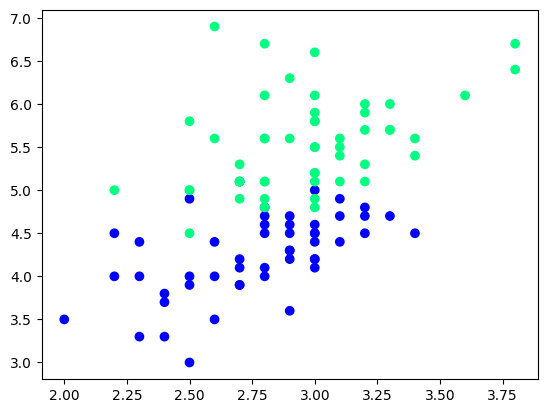

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'], c=df['Species'],cmap='winter')

In [14]:
# Taking only 10 rows for training

df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
138,3.0,4.8,2
124,3.3,5.7,2
113,2.5,5.0,2
97,2.9,4.3,1
85,3.4,4.5,1
89,2.5,4.0,1
51,3.2,4.5,1
67,2.7,4.1,1
101,2.7,5.1,2


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Case 1 Bagging

In [17]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
51,3.2,4.5,1
85,3.4,4.5,1
113,2.5,5.0,2
138,3.0,4.8,2
67,2.7,4.1,1
101,2.7,5.1,2
124,3.3,5.7,2


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
dt_bag1 = DecisionTreeClassifier()

In [20]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values, clf = clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

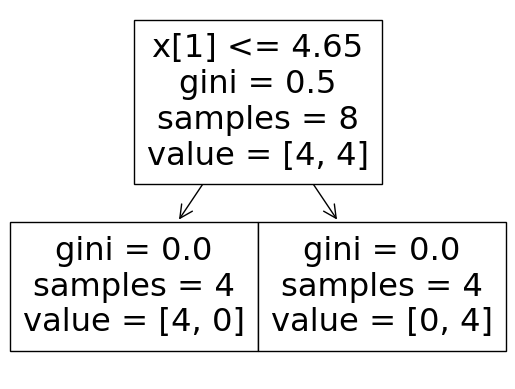

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


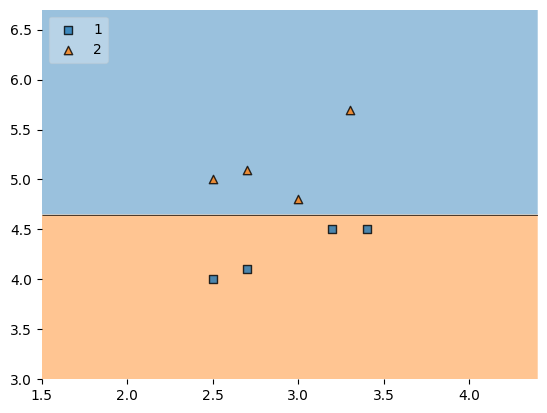

In [21]:
evaluate(dt_bag1,X,y)

In [22]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
138,3.0,4.8,2
51,3.2,4.5,1
85,3.4,4.5,1
72,2.5,4.9,1
67,2.7,4.1,1
72,2.5,4.9,1
113,2.5,5.0,2


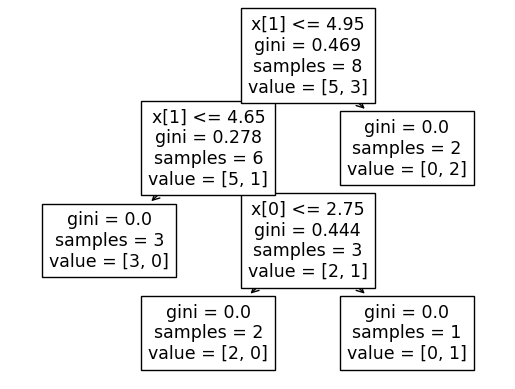

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


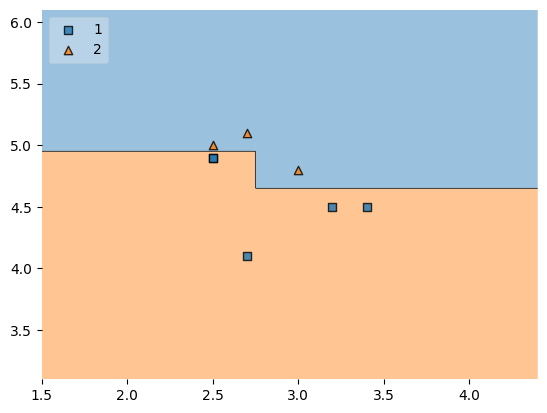

In [23]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [24]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
124,3.3,5.7,2
72,2.5,4.9,1
97,2.9,4.3,1
97,2.9,4.3,1
97,2.9,4.3,1
101,2.7,5.1,2
85,3.4,4.5,1


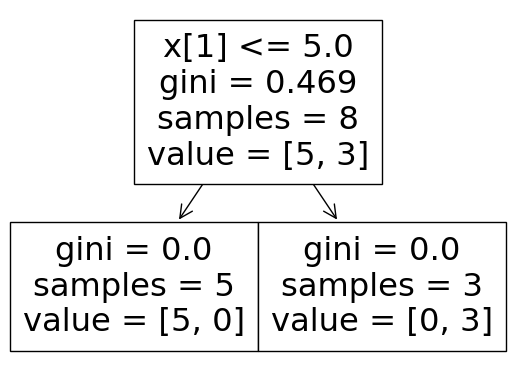

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


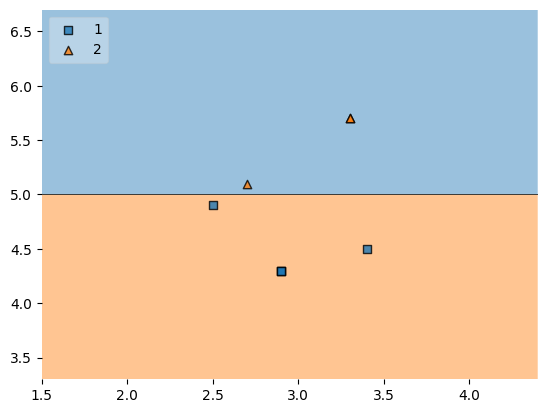

In [25]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [26]:
df_test

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
99,2.8,4.1,1
141,3.1,5.1,2
58,2.9,4.6,1
76,2.8,4.8,1


In [27]:
print("Predictor 1 ",dt_bag1.predict(np.array([3.4,5.4]).reshape(1,2)))
print("Predictor 2 ",dt_bag2.predict(np.array([3.4,5.4]).reshape(1,2)))
print("Predictor 3 ",dt_bag3.predict(np.array([3.4,5.4]).reshape(1,2)))

Predictor 1  [2]
Predictor 2  [2]
Predictor 3  [2]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting
Row Sampling without replacement

In [28]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
89,2.5,4.0,1
72,2.5,4.9,1
51,3.2,4.5,1
97,2.9,4.3,1
113,2.5,5.0,2
138,3.0,4.8,2
67,2.7,4.1,1


# Random Subspaces

In [29]:
df1 = pd.read_csv("/kaggle/input/iris/Iris.csv")
df1 = df1.sample(10)

In [30]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,116,6.4,3.2,5.3,2.3,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa


In [31]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,SepalWidthCm
115,5.3,3.2
80,3.8,2.4
9,1.5,3.1
91,4.6,3.0
34,1.5,3.1
128,5.6,2.8
131,6.4,3.8
55,4.5,2.8
79,3.5,2.6
48,1.5,3.7


# Random Patches

In [32]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,116,6.4,3.2,5.3,2.3,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa


In [33]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,Id
91,3.0,92
115,3.2,116
9,3.1,10
115,3.2,116
48,3.7,49
91,3.0,92
128,2.8,129
128,2.8,129
